In [50]:
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

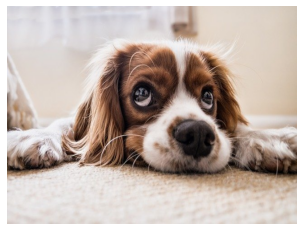

In [57]:
img = cv2.imread("fig/puppy.bmp")

if img is None:
    print("image read failed")
    sys.exit()

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resize = cv2.resize(img,(600,500), interpolation = cv2.INTER_LINEAR)
# cv2.imwrite("img_re.png")
    

cv2.namedWindow("img", cv2.WINDOW_AUTOSIZE)
cv2.imshow("img",img)

while True:
    
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

plt.imshow(imgRGB)
plt.axis("off")
plt.show()

In [4]:
import glob

In [58]:
img_files = glob.glob("./fig1/images/*.*")

cv2.namedWindow("img", cv2.WINDOW_NORMAL)
cv2.setWindowProperty("img", cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

idx = 0

while True:
    img = cv2.imread(img_files[idx])
    
    cv2.imshow("img", img)
    
    if cv2.waitKey(3000) == 27:
        break
    idx += 1
    if idx >= len(img_files):
        idx = 0
    
cv2.destroyAllWindows()

In [59]:
img1 = np.zeros((300,400), dtype = np.uint8)
img2 = np.ones((300,400,3), dtype = np.uint8) * 255
img3 = np.full((300,400,3),(123,234,13), dtype = np.uint8)

In [62]:
src = cv2.imread("./fig1/airplane.bmp")
mask = cv2.imread("./fig1/mask_plane.bmp",0)
dst = cv2.imread("./fig1/field.bmp")

# 합성
cv2.copyTo(src, mask, dst)

cv2.imshow("src",src)
cv2.imshow("mask",mask)
cv2.imshow("dst",dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [63]:
src = cv2.imread("./fig1/cow.png")
dst = cv2.imread("./fig1/green.png")

# mask를 만들기 위해서는 그레이로 바꿔줘야함
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(src_gray, 240, 255, cv2.THRESH_BINARY_INV)

h, w = src_gray.shape[:2]

dst_crop = dst[400:400+h,300:300+w]
cv2.copyTo(src, mask, dst_crop)


cv2.imshow("src",src)
cv2.imshow("dst",dst)
# cv2.imshow("dst",dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [64]:
img = np.full((600,1200,3), 255,np.uint8)

cv2.line(img,(50,50),(300,50),(0,0,255),5)
cv2.arrowedLine(img,(400,50),(400,200),(0,0,255),5)
cv2.rectangle(img,(50,400),(300,500),(0,255,0),-1)
# cv2.rectangle(img,(50,400,250,100),(0,255,0),-1)

cv2.circle(img,(800,200),100,(255,0,0),5,cv2.LINE_AA)

text = "Hello OPenCV"
cv2.putText(img, text,(600,400),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),1,cv2.LINE_AA)


cv2.imshow("img",img)

cv2.waitKey()
cv2.destroyAllWindows()

In [65]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Video capture failed")
    sys.exit()

while True:
    
    ret, frame = cap.read()
    
    if ret is None:
        print("frame read failed")
        break
    edge = cv2.Canny(frame, 50,150) #일차 미분 필터
    
    
    cv2.imshow("image", frame)
    cv2.imshow("edge", edge)
    
    
    if cv2.waitKey(30) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

In [47]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Video capture failed")
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc=cv2.VideoWriter_fourcc(*"DIVX")

print(w, h)
 
out = cv2.VideoWriter("output.avi", fourcc = fourcc, fps = fps, frameSize= (w,h))    
    
while True:
    
    ret, frame = cap.read()
    
    if ret is None:
        print("frame read failed")
        break
################################################################    
    edge = cv2.Canny(frame, 50,150) #일차 미분 필터
    edge_color = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
#####################################################################    
    out.write(edge_color)
    
    cv2.imshow("image", frame)
    cv2.imshow("edge", edge)
    
    
    if cv2.waitKey(30) == 27:
        break
        
out.release()
cap.release()
cv2.destroyAllWindows()

640 480


In [56]:
# 키보드 처리

img =cv2.imread("./fig1/cat.bmp",0)

if img is None:
    print("image read failed")
    sys.exit()
    
cv2.imshow("img",img)


while True:
    key = cv2.waitKey()
    if key == 27 or key == ord("q"):
        break
        
    elif key == ord("i"):
        img1= 255-img
        cv2.imshow("img", img1)
    
    elif key ==ord("e"):
        edge = cv2.Canny(img,50,150)
        cv2.imshow("img",edge)
        
    elif key == ord("r"):
        cv2.imshow("img", img)
cv2.destroyAllWindows()